## Assignment #5
## David Perry - sez326
## Chapter 6, Exercises 2, 9, & 11 (which I did not attempt).

For parts (a) through (c), indicate which of i. through iv. is correct.  Justify your answer.

a.	The lasso, relative to least squares, is:
i.	More flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.
ii.	More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.
iii.	Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.
iv.	Less flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.

The correct answer for part (a) is iii.  The lasso is less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.

Explanation/Justification: Lasso’s advantage over least squares is rooted in the bias-variance tradeoff.  When the least squares estimates have excessively high variance, the lasso solution can yield a reduction in variance at the expense of a small increase in bias.  This consequently can generate more accurate predictions.  In addition, lasso performs variable selection which makes it easier to interpret than other methods like ridge regression.

b.	The ridge regression, relative to least squares, is:
i.	More flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.
ii.	More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.
iii.	Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.
iv.	Less flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.

The correct answer for part (b) is iii.  Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in vari/Justificationance.

Explanation: Ridge regression and lasso’s advantage over least squares is rooted in the bias-vari$/lambda$ce trade-off.  As λ� increases, the flexibility of the ridge regression fit decreases leading to decreased variance, but increased bias.  The r$/lammbda$ationship between λ� and variance and bias in this regression method is the key holder to understanding the relationship.  When there is small change in the training data, the least squares coefficient produces a large change and larger value for variance.  Whereas ridge regression can still perform well by trading off a small increase in bias for a large decrease in variance.  Hence, between these two methods, ridge regression works best in situations where the least squares estimates have high variance.  The big difference between ridge and lasso is that lasso performs variance selection and makes it easier to interpret.

c.	The non-linear methods, relative to least squares, is:
i.	More flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.
ii.	More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.
iii.	Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.
iv.	Less flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.

The correct answer for part C is ii.  More flexible and hence will give improved accuracy when its increase in variance is less than its decrease in bias.



## Preprocessing

In [238]:
# import relevant statistical packages
import numpy as np
import pandas as pd
pd.__version__

'1.5.3'

In [239]:
import warnings
warnings.filterwarnings('ignore')

In [240]:
# import relevant data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#set plot figure size to 15 x 12
plt.rcParams["figure.figsize"] = (15, 12)

In [241]:
# import custom packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    LinearRegression,
    LassoCV,
    RidgeCV,
                                )
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2, mean_squared_error
#from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
#from mlxtend.plotting import plot_linear_regression as PLS

In [242]:
# Load data
#from ISLP import load_data

#Loading the data set.
College = pd.read_csv('C:/Users/david/Documents/Predictive Modeling/college.csv', index_col = 'Unnamed: 0')
College

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [243]:
College.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [244]:
College.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [245]:
College.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [246]:
print(College.dtypes)
#College['Private']=College['Private'].astype(str)
#print(College.dtypes)

Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object


In [247]:
# verify duplicate values
College.duplicated().sum()

0

In [248]:
College.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [249]:
College

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [250]:
# Verify there are no missing values
College.isnull().sum()
#College.isnull().sum().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [251]:
#plt.xkcd()
#plt.figure(figsize = (25, 10))
#sns.heatmap(College.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [252]:
## There are no missing values as shown by the heatmap above. 

In [253]:
# Descriptive Statistics
College.describe().T
#College.describe()

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,"3,001.6383526383524","3,870.201484435291",81.0,776.0,"1,558.0","3,624.0","48,094.0"
Accept,777.0,"2,018.8043758043757","2,451.113970992631",72.0,604.0,"1,110.0","2,424.0","26,330.0"
Enroll,777.0,779.972972972973,929.17619013287,35.0,242.0,434.0,902.0,"6,392.0"
Top10perc,777.0,27.55855855855856,17.640364385452134,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.7966537966538,19.80477759513136,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,"3,699.907335907336","4,850.42053088738",139.0,992.0,"1,707.0","4,005.0","31,643.0"
P.Undergrad,777.0,855.2985842985843,"1,522.4318872955134",1.0,95.0,353.0,967.0,"21,836.0"
Outstate,777.0,"10,440.66924066924","4,023.0164841119686","2,340.0","7,320.0","9,990.0","12,925.0","21,700.0"
Room.Board,777.0,"4,357.526383526383","1,096.696415593528","1,780.0","3,597.0","4,200.0","5,050.0","8,124.0"
Books,777.0,549.3809523809524,165.10536013709293,96.0,470.0,500.0,600.0,"2,340.0"


array([[<AxesSubplot:title={'center':'Apps'}>,
        <AxesSubplot:title={'center':'Accept'}>,
        <AxesSubplot:title={'center':'Enroll'}>,
        <AxesSubplot:title={'center':'Top10perc'}>],
       [<AxesSubplot:title={'center':'Top25perc'}>,
        <AxesSubplot:title={'center':'F.Undergrad'}>,
        <AxesSubplot:title={'center':'P.Undergrad'}>,
        <AxesSubplot:title={'center':'Outstate'}>],
       [<AxesSubplot:title={'center':'Room.Board'}>,
        <AxesSubplot:title={'center':'Books'}>,
        <AxesSubplot:title={'center':'Personal'}>,
        <AxesSubplot:title={'center':'PhD'}>],
       [<AxesSubplot:title={'center':'Terminal'}>,
        <AxesSubplot:title={'center':'S.F.Ratio'}>,
        <AxesSubplot:title={'center':'perc.alumni'}>,
        <AxesSubplot:title={'center':'Expend'}>],
       [<AxesSubplot:title={'center':'Grad.Rate'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

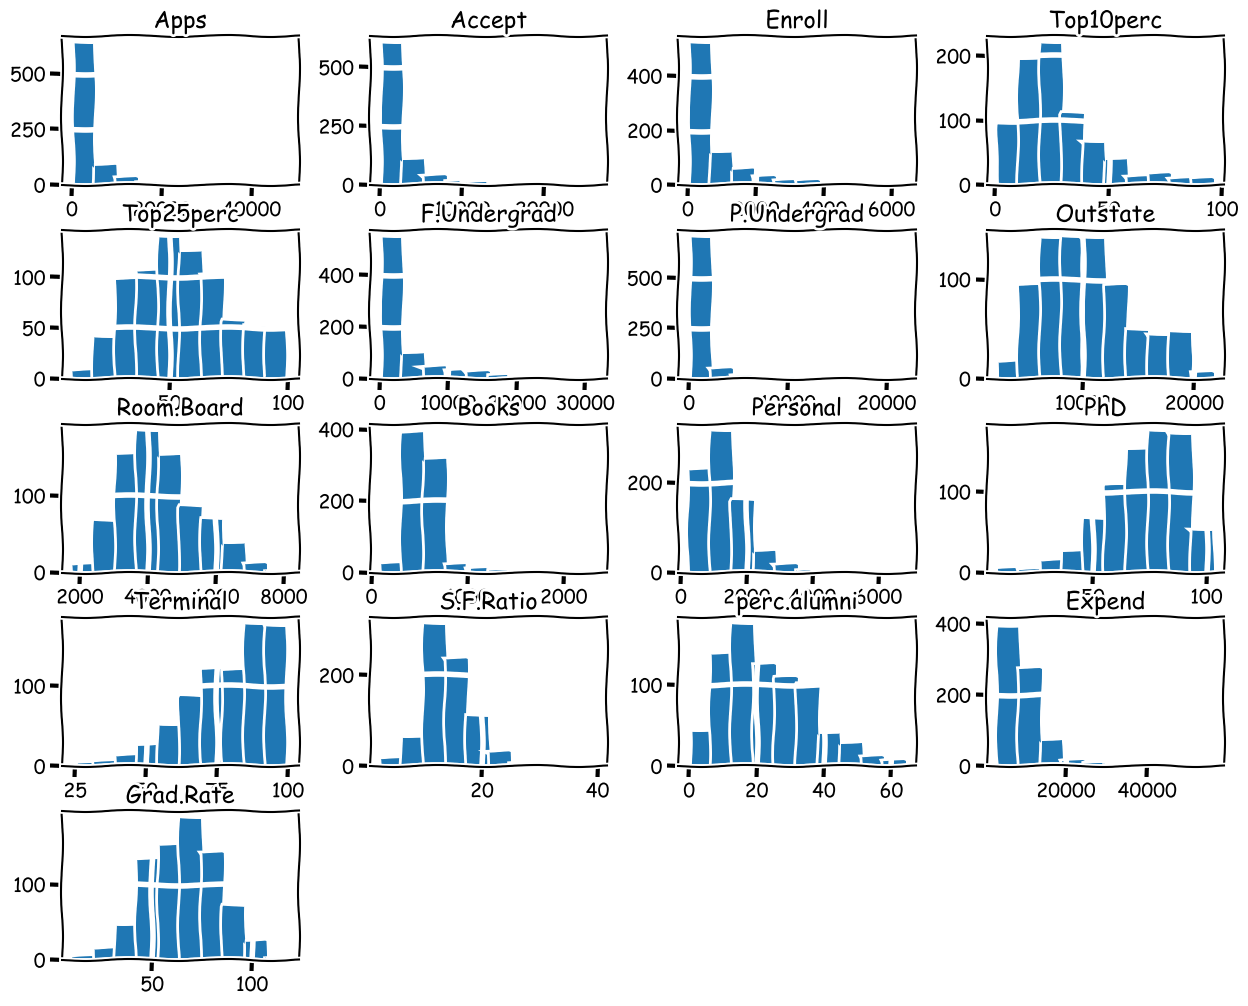

In [254]:
College.hist()

<AxesSubplot:>

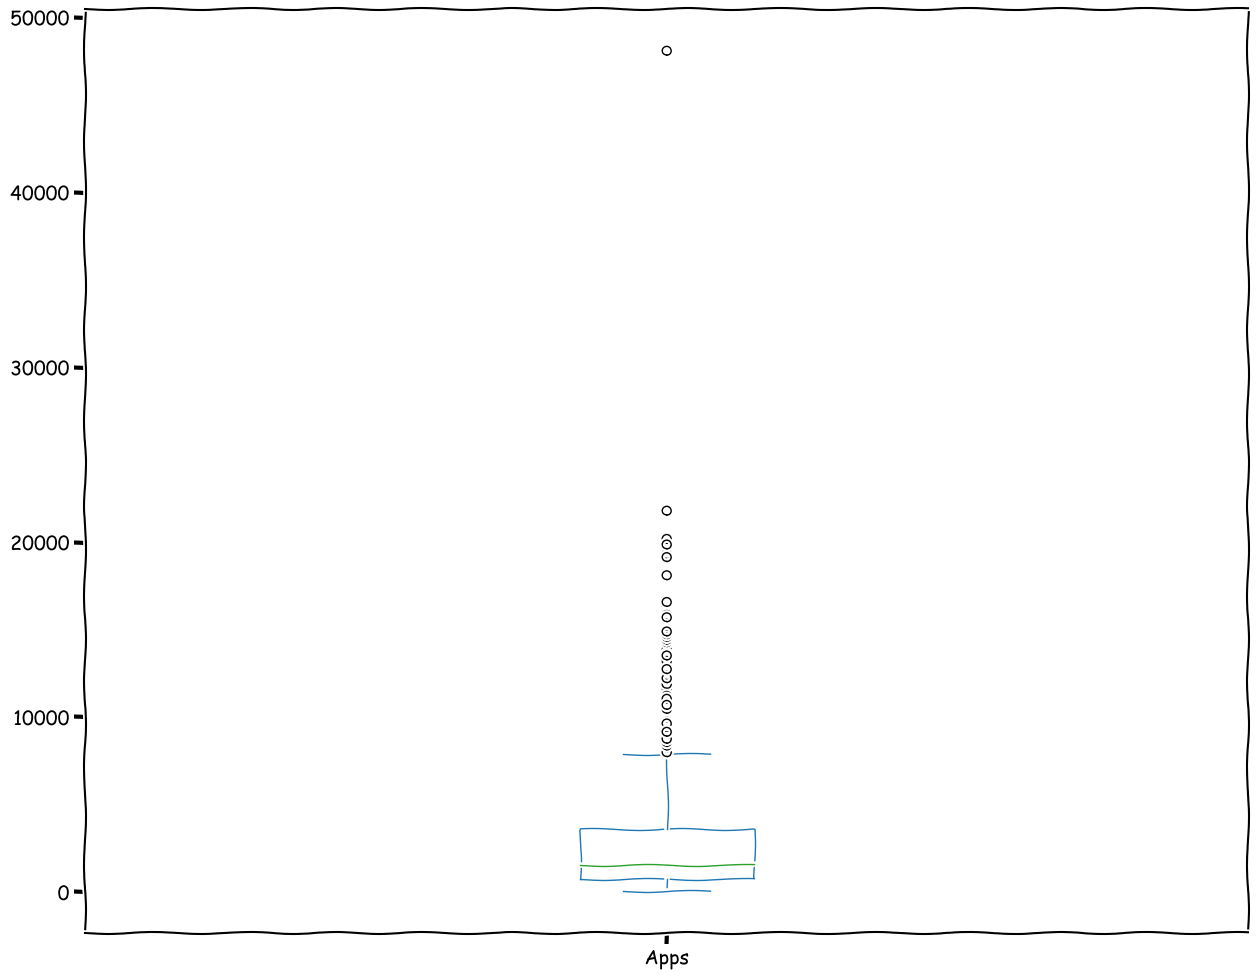

In [255]:
# 'Apps' boxplot
College['Apps'].plot(kind='box')

In [256]:
# There are a lot of outliers

<AxesSubplot:>

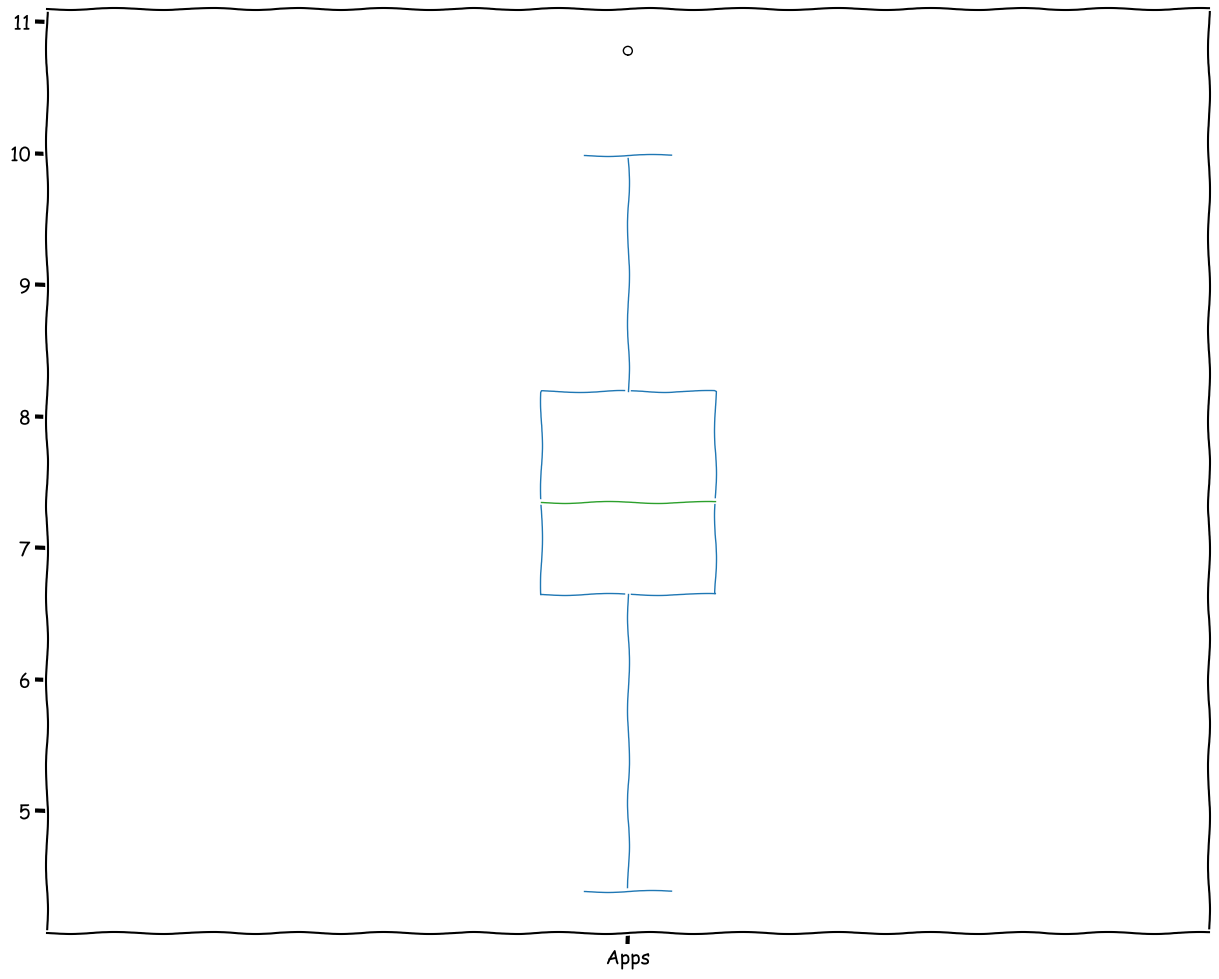

In [257]:
# boxplot log transform 'Apps'
np.log(College['Apps']).plot(kind = 'box')

<AxesSubplot:ylabel='Frequency'>

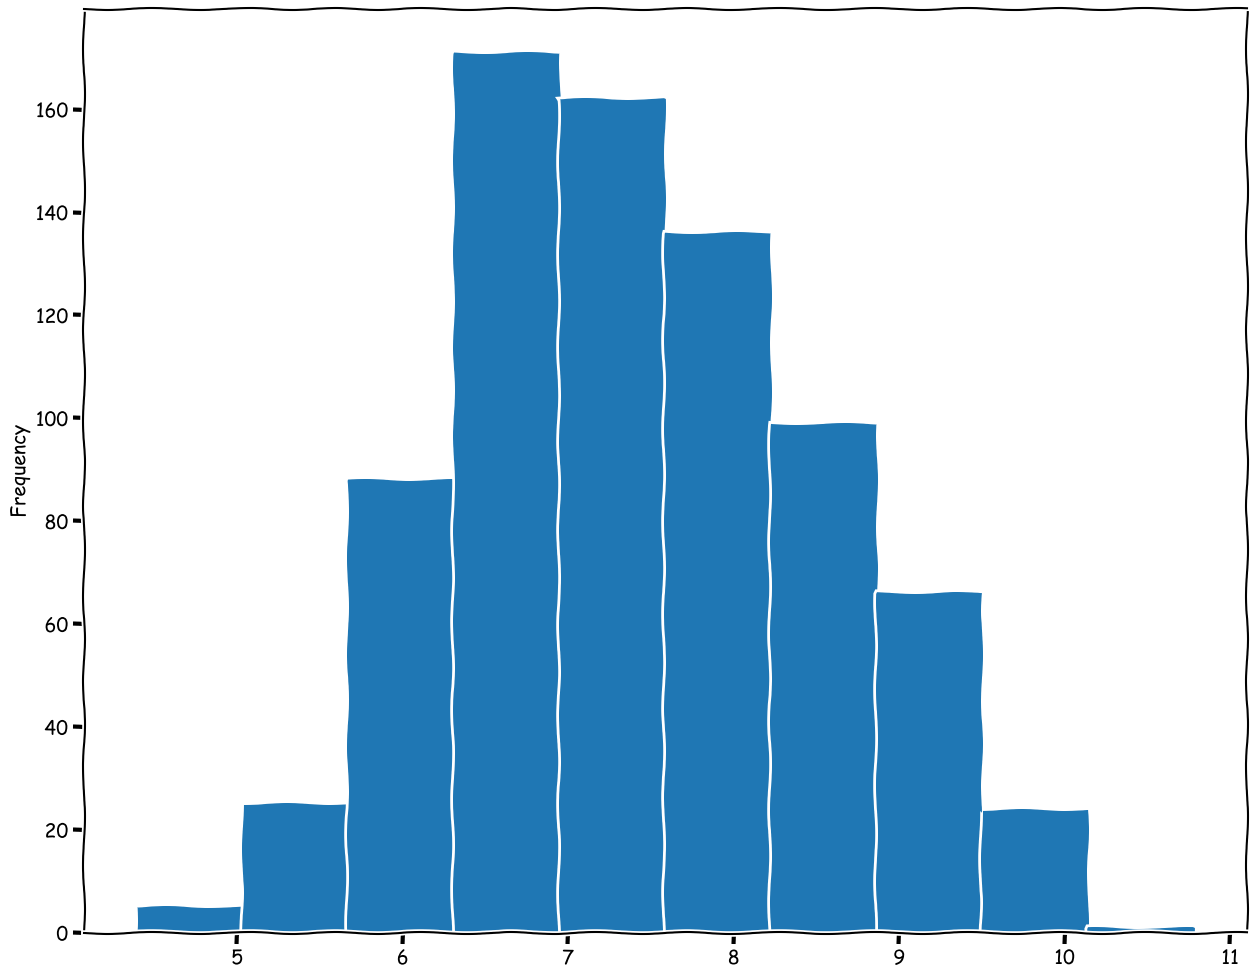

In [258]:
# histogram log transform 'Apps'
np.log(College['Apps']).plot(kind = 'hist')

In [259]:
# create 'log_Apps'
#College['log_Apps'] = np.log(College['Apps'])

In [260]:
# count 'Private'
College['Private'].value_counts(normalize=True)

Yes   0.7271557271557272
No    0.2728442728442728
Name: Private, dtype: float64

In [261]:
# convert "Private" to binary
College['Private'] = (College['Private'] =='Yes').astype(int)

In [262]:
College.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [263]:
College.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    int32  
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

<AxesSubplot:>

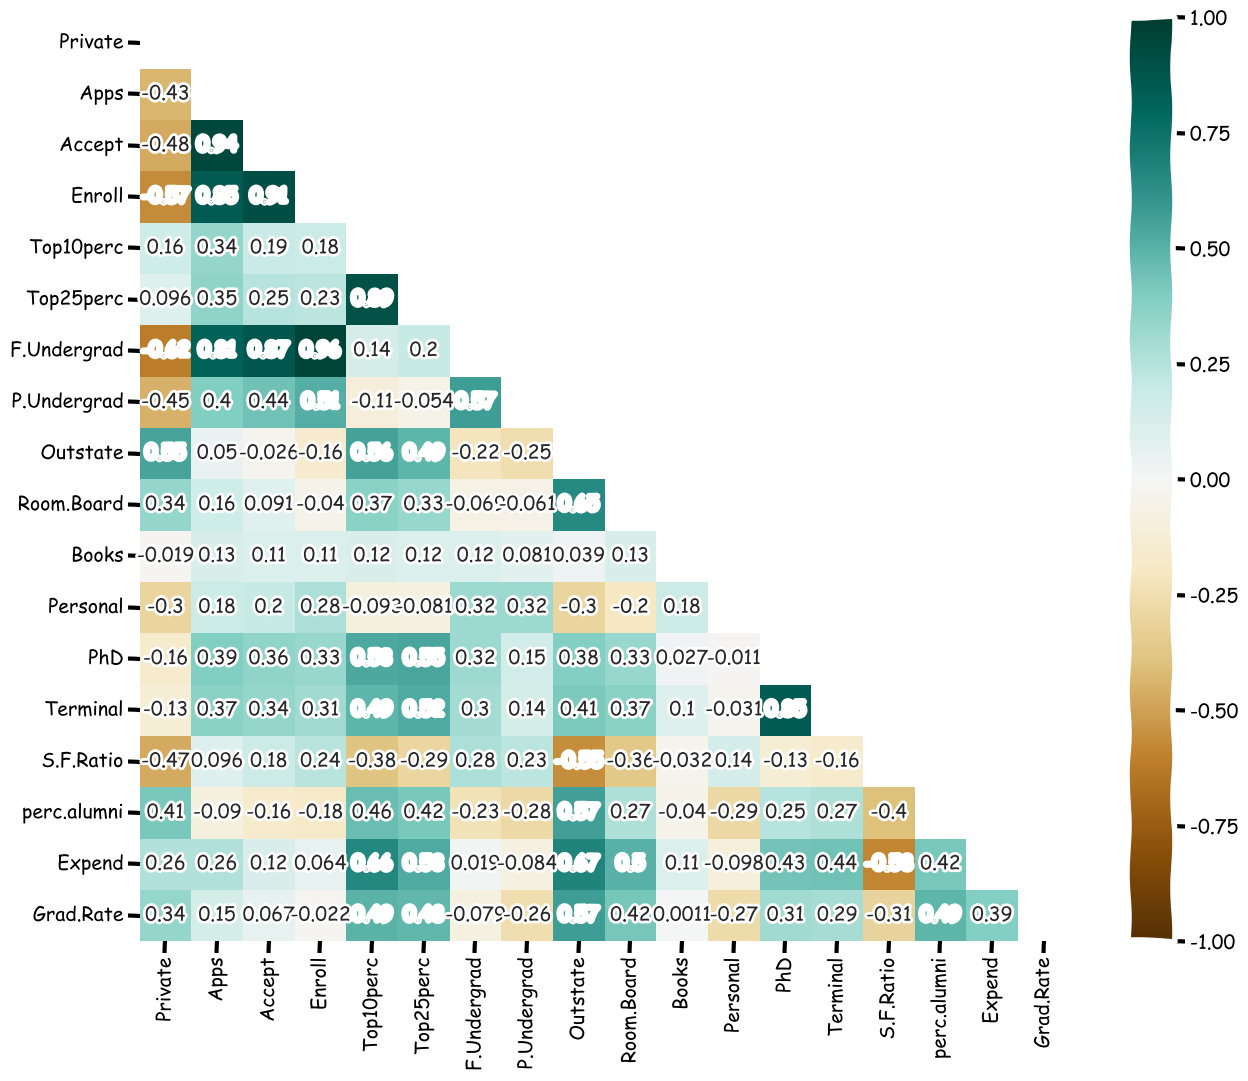

In [264]:
# Correlation heatmap
sns.heatmap(College.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG', mask = np.triu(College.corr()))

In [265]:
# Because of the multiple predictos (high dimensionality), there are various features that exhibit high correlation (i.e. multicolinearity is present).

In [266]:
#College = pd.get_dummies(College, drop_first=True)

In [267]:
#College.head()

## 9.a. Splitting the data set into a training set and a test set

In [268]:
from sklearn.model_selection import train_test_split
X = College.drop(columns=['Apps'])
y = College['Apps']

In [269]:
# stratified binning for continuous target

# define number of bins
num_observations = College.shape[0]
bins = np.linspace(0, num_observations, 8)
bins

array([  0., 111., 222., 333., 444., 555., 666., 777.])

In [270]:
# save y values broken down by bins created
y_binned = np.digitize(y, bins)

In [271]:
# split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y_binned, random_state = 2020)

In [272]:
# print training and test shapes
print(X_train.shape)
print(X_test.shape)

(543, 17)
(234, 17)


<AxesSubplot:title={'center':'Test'}, ylabel='Density'>

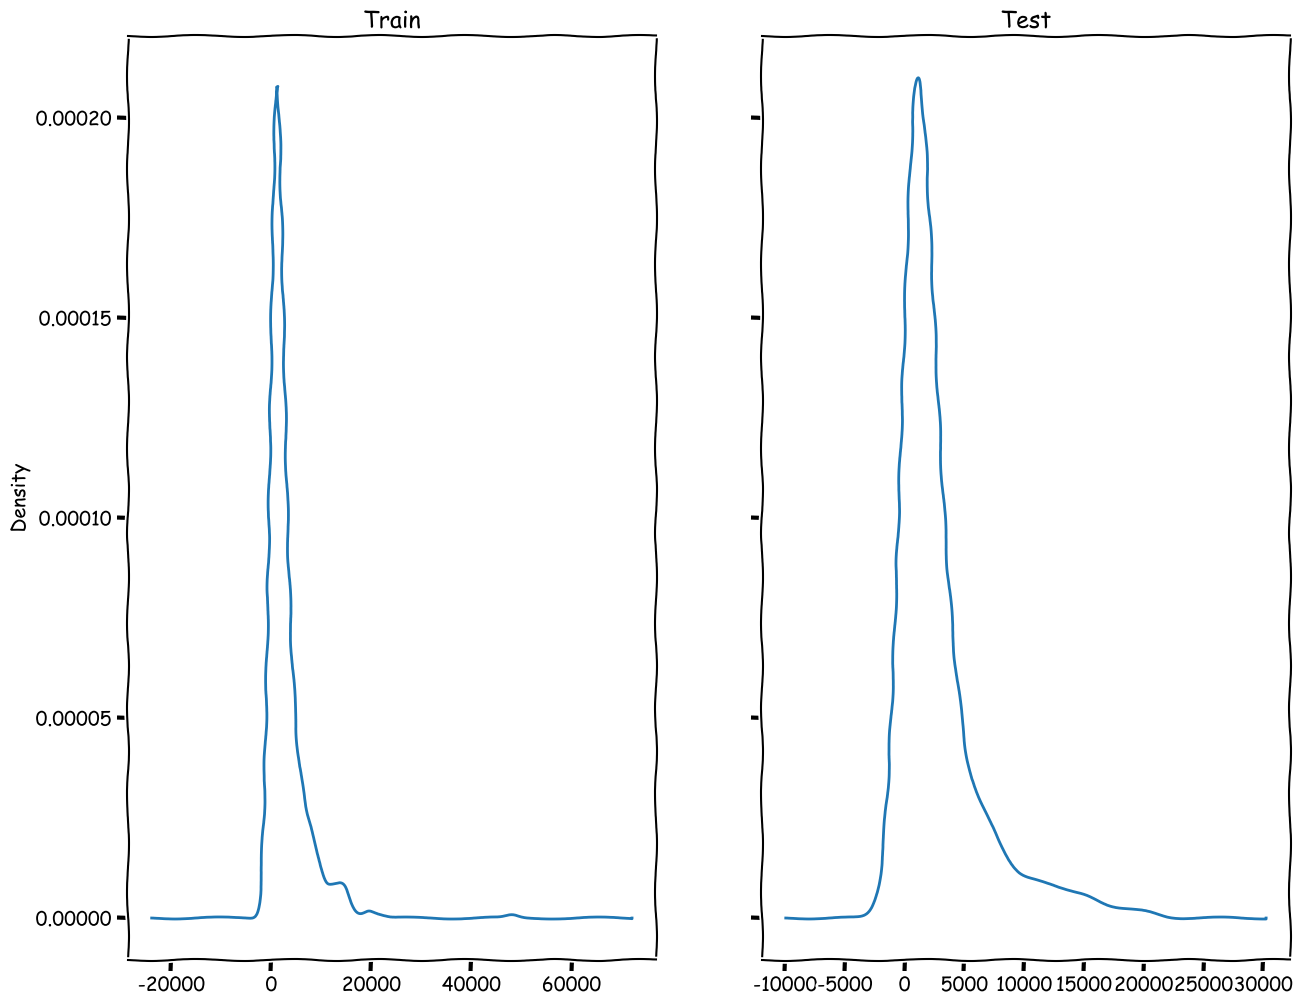

In [273]:
# kernal density plots for y_train and y_test
fig, (ax_1, ax_2) = plt.subplots(ncols = 2, sharey = True)
y_train.plot(kind = 'kde', ax = ax_1, title = 'Train')
y_test.plot(kind = 'kde', ax = ax_2, title = 'Test')

## 9.b. Fitting a linear model using least squares

In [274]:
# make pipeline with StandardScaler() and LinearRegression()
linear_regression = make_pipeline(StandardScaler(), LinearRegression())
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [275]:
# MSE
ols_mse = mean_squared_error(y_test, linear_regression.predict(X_test)).round(4)
ols_mse

966414.9739

In [276]:
# linear regression model coefficient estimates
feature_names = X_train.columns
linear_regression_coef = linear_regression[-1].coef_
list(zip(feature_names, linear_regression_coef))

[('Private', -182.526718546227),
 ('Accept', 4125.457692439092),
 ('Enroll', -1479.3376955181282),
 ('Top10perc', 1145.6013713516759),
 ('Top25perc', -497.9720916525072),
 ('F.Undergrad', 823.8178263151871),
 ('P.Undergrad', 48.97012010118626),
 ('Outstate', -474.1072022407388),
 ('Room.Board', 204.69988553507335),
 ('Books', 52.09289284212725),
 ('Personal', 9.399719590297789),
 ('PhD', -127.18566695714787),
 ('Terminal', -57.1138364000733),
 ('S.F.Ratio', 46.715186692820595),
 ('perc.alumni', 62.96041402205404),
 ('Expend', 452.5092229232461),
 ('Grad.Rate', 241.9229754462884)]

## 9.c. Ridge Regression Model

In [277]:
ridge_cv = make_pipeline(StandardScaler(), RidgeCV())
ridge_cv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridgecv', RidgeCV())])

In [278]:
# MSE
ridge_mse = mean_squared_error(y_test, ridge_cv.predict(X_test)).round(4)
ridge_mse

962339.9227

In [279]:
# tuned alpha
ridge_cv[-1].alpha_

0.1

In [280]:
# Ridge regression coefficient estimates
ridge_cv_coef = ridge_cv[-1].coef_
list(zip(feature_names, ridge_cv_coef))

[('Private', -183.0068796351552),
 ('Accept', 4118.42222038476),
 ('Enroll', -1462.9553305387672),
 ('Top10perc', 1142.4688069595722),
 ('Top25perc', -495.28273363562766),
 ('F.Undergrad', 813.3962091191206),
 ('P.Undergrad', 49.26238081380143),
 ('Outstate', -472.8567241621204),
 ('Room.Board', 205.1076462729834),
 ('Books', 52.18314561655279),
 ('Personal', 9.355486499582184),
 ('PhD', -127.00223473766528),
 ('Terminal', -57.30336186214117),
 ('S.F.Ratio', 46.73612883704482),
 ('perc.alumni', 62.12206497852458),
 ('Expend', 452.54952830972616),
 ('Grad.Rate', 241.65854876891535)]

#Therefore, the MSE through Ridge Regression for the best value of $\lambda$ is slightly lower than that of least squares regression.

## 9.d. Lasso Regression Model

In [281]:
lasso_cv = make_pipeline(StandardScaler(), LassoCV())
lasso_cv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lassocv', LassoCV())])

In [282]:
# MSE
lasso_mse = mean_squared_error(y_test, lasso_cv.predict(X_test)).round(4)
lasso_mse

902138.2313

In [283]:
# tunes alpha
lasso_cv[-1].alpha_

3.7684525746195665

In [284]:
# Lasso regression coefficient estimates
lasso_cv_coef = lasso_cv[-1].coef_
list(zip(feature_names, lasso_cv_coef))

[('Private', -181.20794801830579),
 ('Accept', 4063.175161107204),
 ('Enroll', -1249.713103957477),
 ('Top10perc', 1090.190432901896),
 ('Top25perc', -444.23557982627335),
 ('F.Undergrad', 648.9571201865566),
 ('P.Undergrad', 49.924564675725705),
 ('Outstate', -449.7875108973564),
 ('Room.Board', 198.71827472237155),
 ('Books', 49.55309976219683),
 ('Personal', 6.760306317456123),
 ('PhD', -121.82195513539524),
 ('Terminal', -53.43992724030474),
 ('S.F.Ratio', 38.18611287745688),
 ('perc.alumni', 42.914896118960606),
 ('Expend', 443.4663994361002),
 ('Grad.Rate', 228.0832784943451)]

### Coefficient Plot

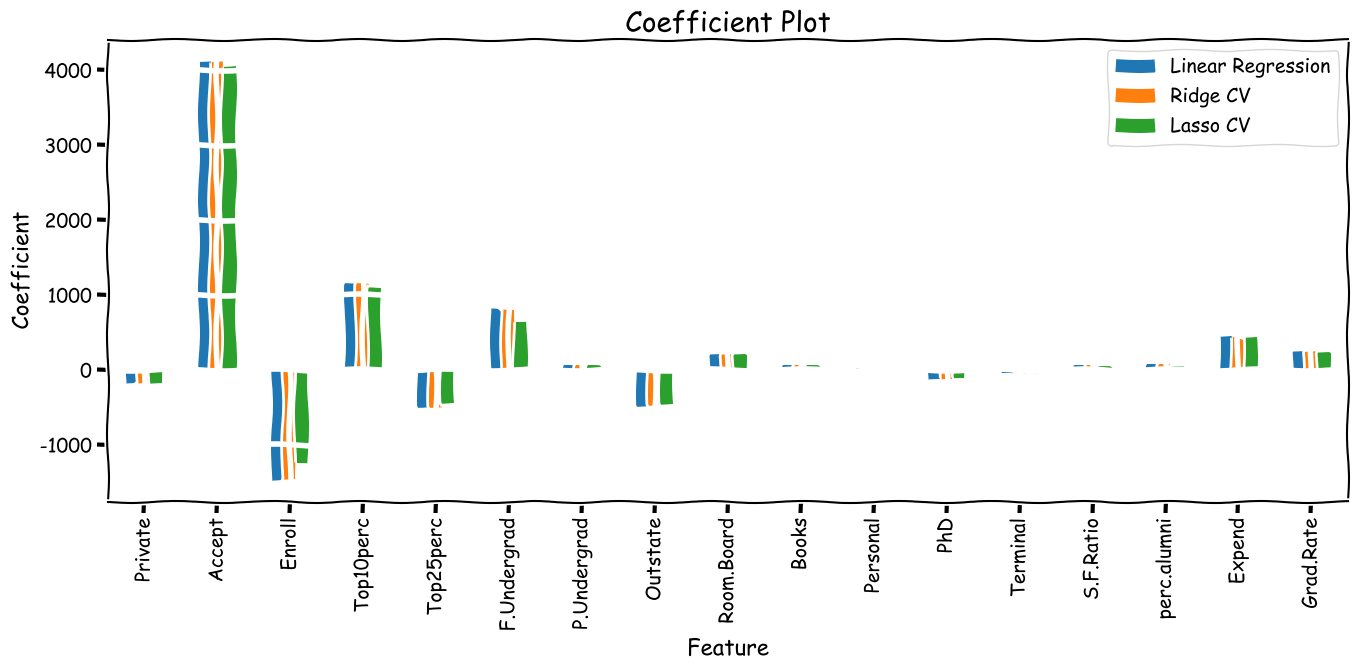

In [285]:
def plot_save_coefficient():

    pd.DataFrame(
        {
            "Linear Regression": linear_regression_coef,
            "Ridge CV": ridge_cv_coef,
            "Lasso CV": lasso_cv_coef,
        },
        index=feature_names,
    ).plot.bar(
        figsize=(16, 6),
        grid=True,
    )
    plt.title("Coefficient Plot", fontsize=20)
    plt.xlabel("Feature", fontsize=16)
    plt.ylabel("Coefficient", fontsize=16)

    # plt.savefig("../static/coefficient.png", format="png")
    plt.show()


plot_save_coefficient()

In [286]:
# print MSE for each model
print('OLS   = ', ols_mse)
print('Ridge = ', ridge_mse)
print('Lasso = ', lasso_mse)

OLS   =  966414.9739
Ridge =  962339.9227
Lasso =  902138.2313


#Therefore, the MSE through Lasso Rregression for the best value of $\lambda$ is lwer than the Leaset Squares Regression and Ridge Regression.

### 9.e Principal Components Regression (PCR)

In [287]:
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold as KF
from sklearn.decomposition import PCA

In [288]:
pca = PCA()
X_scaled = pca.fit_transform(scale(X))
pd.DataFrame(pca.components_.T).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.20281185180424102,-0.31955892200959934,0.14937181931811594,0.20719130104041253,-0.0315019219460057,-0.036004410667619925,0.16895594558914756,0.045177559292448356,0.1005068184279167,0.2556593298066847,-0.679925402511938,0.24333023256011815,0.40044249872983795,0.022855675383451596,-0.005082940783164382,-0.01818488151648184,0.020709635335343018
1,0.013149871329518352,0.41903333197327425,-0.02710705144904029,0.362324105398607,-0.11208647470759359,0.0022943602748736027,-0.024321591900828013,-0.07800898754228196,-0.20599888861002696,0.11151860017110592,-0.13935016348947948,0.01223738161159539,-0.08464487115792774,-0.04459110469470922,0.6682088929005017,0.34091648756140236,0.16327447864600825
2,-0.028704584965655627,0.4429516388129782,-0.028316614612797008,0.2504153788330967,-0.17548938884266904,-0.0534787456506716,-0.03828409340830563,0.022375564663963957,-0.15871402215164832,0.10702775566263874,-0.09976449303969549,-0.01152765148810953,0.08421907203127177,-0.005394791264354444,-0.2899848323783316,-0.09178842087845569,-0.7466379076280854
3,0.3447362516404179,0.1304124357398505,0.00560206212626263,-0.22101874764467644,-0.33196721395280776,-0.059988523854966634,-0.14261885939896995,-0.15538098913430384,0.33500396514910485,0.05622983757226531,0.022198447064932517,-0.015129508216151603,0.044254612207037226,-0.10073782779362155,-0.29895160204744314,0.6610227321717534,0.04943461024043402
4,0.31867477075209827,0.16142254252328958,-0.05765506239608406,-0.2524824034364031,-0.34436020493369673,0.020635564187826406,-0.08352228180818858,-0.1369216568580944,0.4046343883508825,0.04070938098290319,-0.13780134563505206,-0.23205052797436526,-0.10087114186813816,0.13736500482622008,0.3248587492190467,-0.5340817717029835,-0.050406508603434465


In [289]:
# selecting M, the number of components that give the lowest cross-validation error
from sklearn.model_selection import cross_val_score

n = len(X)
kf10 = KF(n_splits=10, shuffle=True, random_state=42)

lm = LinearRegression()
MSEdf= pd.DataFrame()

# calculating MSE with only the intercept through cross-validation
mse = -1 * cross_val_score(lm, np.ones((n,1)), y.ravel(), cv=kf10, scoring='neg_mean_squared_error').mean()    
MSEdf = MSEdf.append([round(mse, 9)])

# calculating MSE for the 17 components through cross-validation
for i in np.arange(1, 18):
    mse = -1 * cross_val_score(lm, X_scaled[:,:i], y.ravel(), cv=kf10, scoring='neg_mean_squared_error').mean()
    MSEdf = MSEdf.append([round(mse, 9)])
    
MSEdf.reset_index(drop=True, inplace=True)
MSEdf.columns = ['MSE']
MSEdf

,MSE
0,"15,010,654.411037762"
1,"14,703,163.995916668"
2,"4,168,014.79184856"
3,"4,181,084.918514462"
4,"2,853,095.726312842"
5,"2,542,134.721528306"
6,"2,549,380.55976864"
7,"2,516,723.593201375"
8,"2,367,537.694021384"
9,"2,280,221.426632368"


Text(0, 0.5, 'MSE')

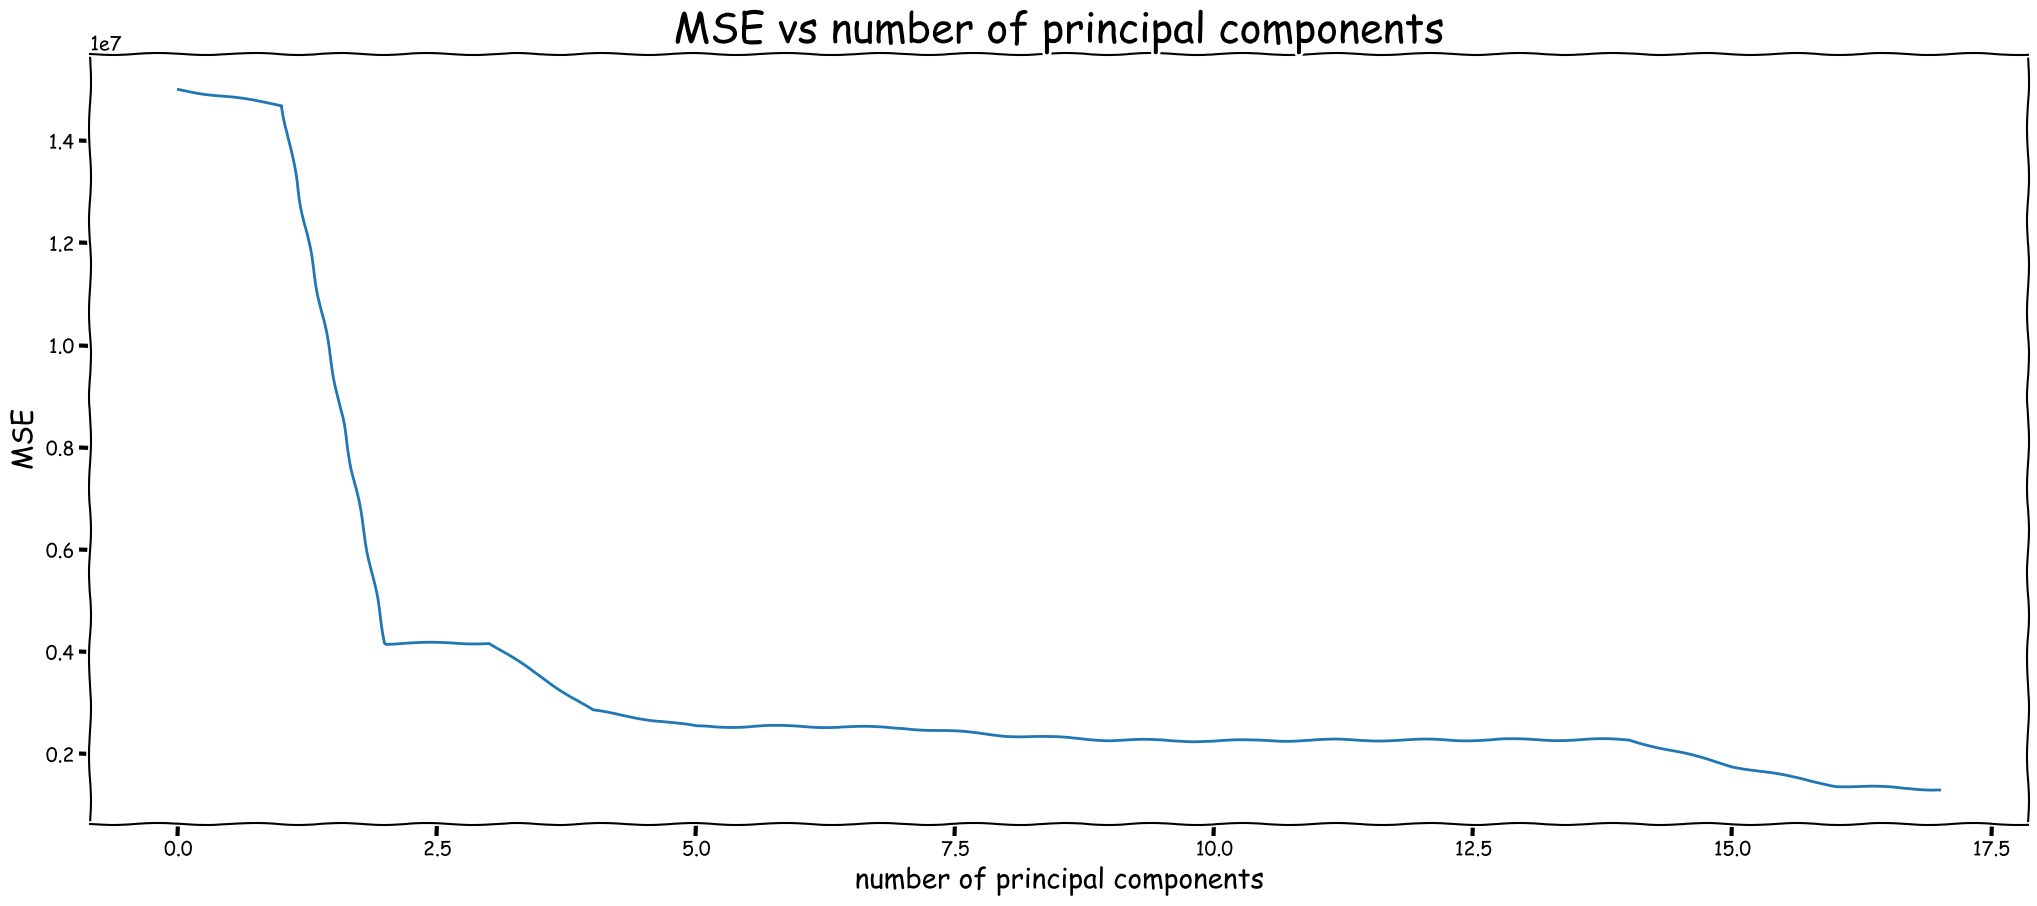

In [290]:
# plotting MSE for each component
# plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(MSEdf)
plt.title('MSE vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('MSE', fontsize = 20)

Text(0, 0.5, 'explained variance ratio')

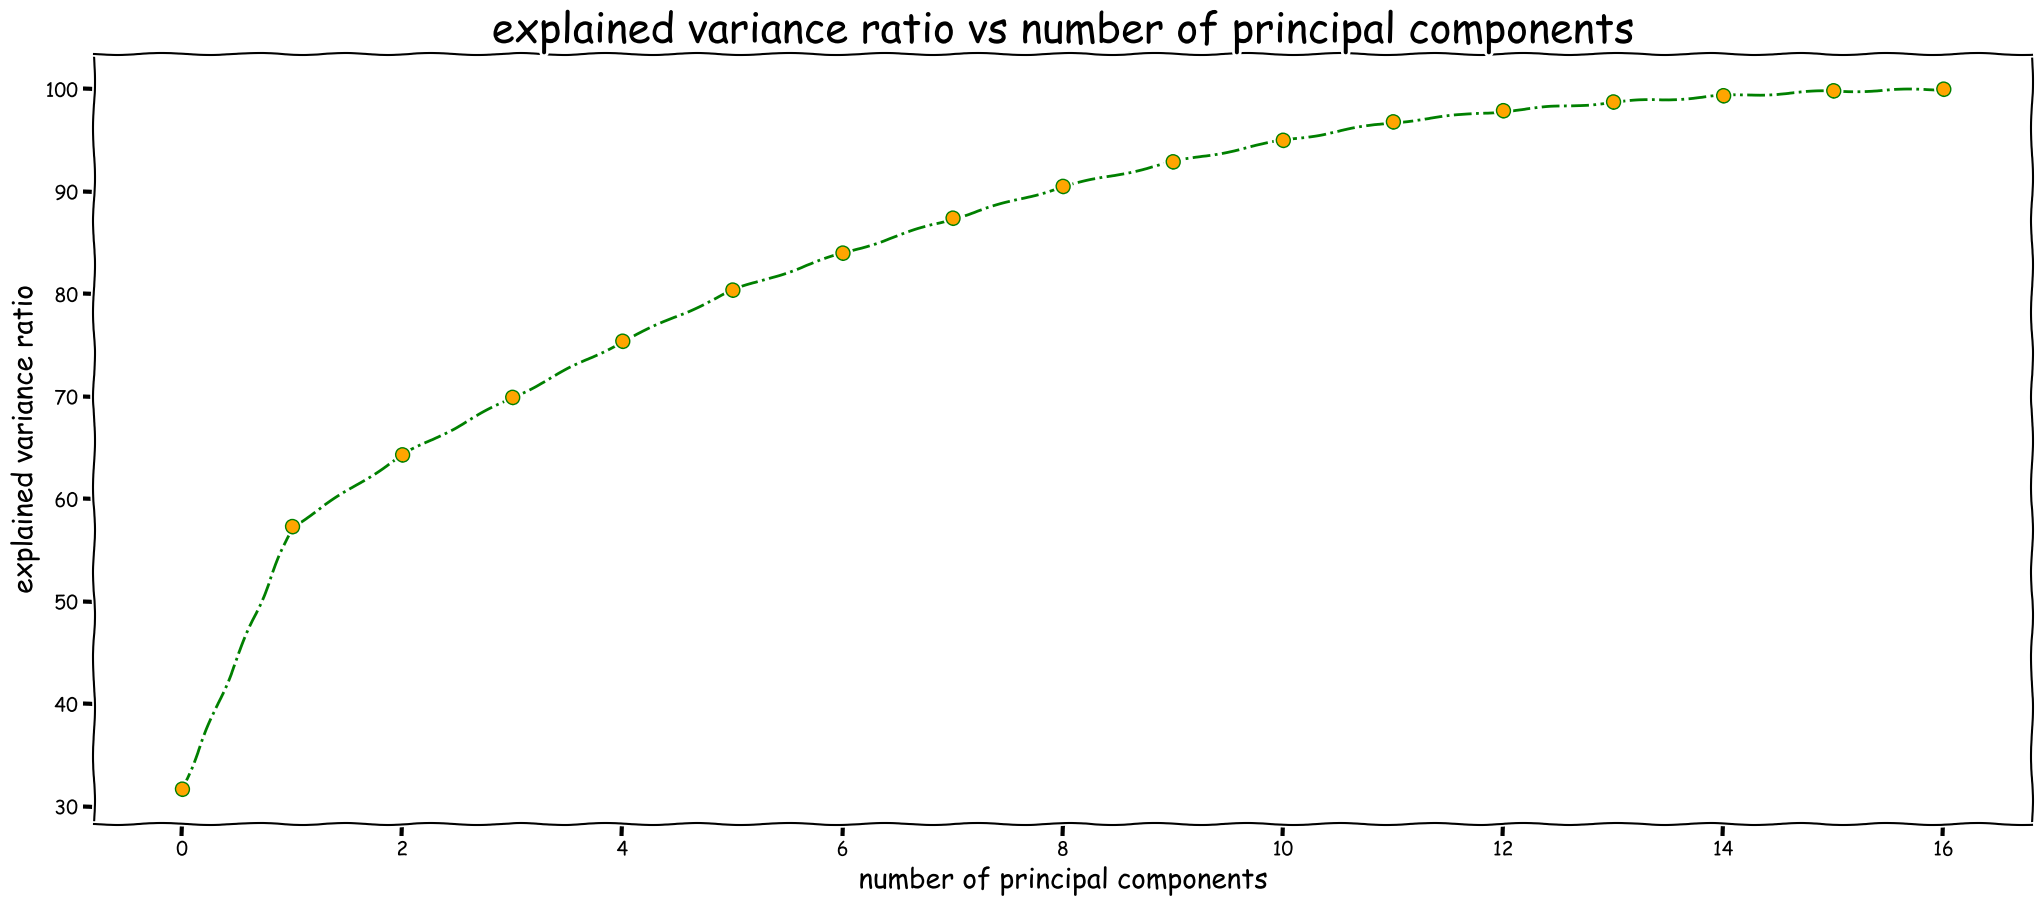

In [291]:
# plotting explained variance ratio
exp_var_ratio = pd.DataFrame(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))

# plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(exp_var_ratio, color='green', linestyle ='-.', marker='o', markersize=10, markerfacecolor='orange')
plt.title('explained variance ratio vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('explained variance ratio', fontsize = 20)

#### Comment: This suggests that the lowest MSE will be a M = 17, which is the same as performing a regular least ssquarews regression.  Next will be a PCR on the training set and validate the model using the test set.

In [292]:
# performing PCR on train and test data sets
pca_train = PCA()
X_scaled_train = pca_train.fit_transform(scale(X_train))
n = len(X_scaled_train)

lmtrain = LinearRegression()

kf10train = KF(n_splits=10, shuffle=True, random_state=42)
MSEdftrain= pd.DataFrame()

# calculating MSE with only the intercept through cross-validation
msetrain = -1 * cross_val_score(lmtrain, np.ones((n,1)), y_train.ravel(), cv=kf10train, scoring='neg_mean_squared_error').mean()    
MSEdftrain = MSEdftrain.append([msetrain])

# calculating MSE for the 17 components through cross-validation
for i in np.arange(1, 18):
    msetrain = -1 * cross_val_score(lmtrain, X_scaled_train[:,:i], y_train.ravel(), cv=kf10train, scoring='neg_mean_squared_error').mean()
    MSEdftrain = MSEdftrain.append([msetrain])
    
MSEdftrain.reset_index(drop=True, inplace=True)
MSEdftrain.columns = ['MSE']
MSEdftrain

,MSE
0,"16,273,093.818500038"
1,"15,483,863.713882428"
2,"4,822,061.811684109"
3,"4,714,787.395604296"
4,"3,266,219.3793840683"
5,"3,288,687.450685587"
6,"3,209,234.9752105414"
7,"3,022,021.2364401356"
8,"2,969,864.0330881295"
9,"2,900,182.723543017"


Text(0, 0.5, 'MSE')

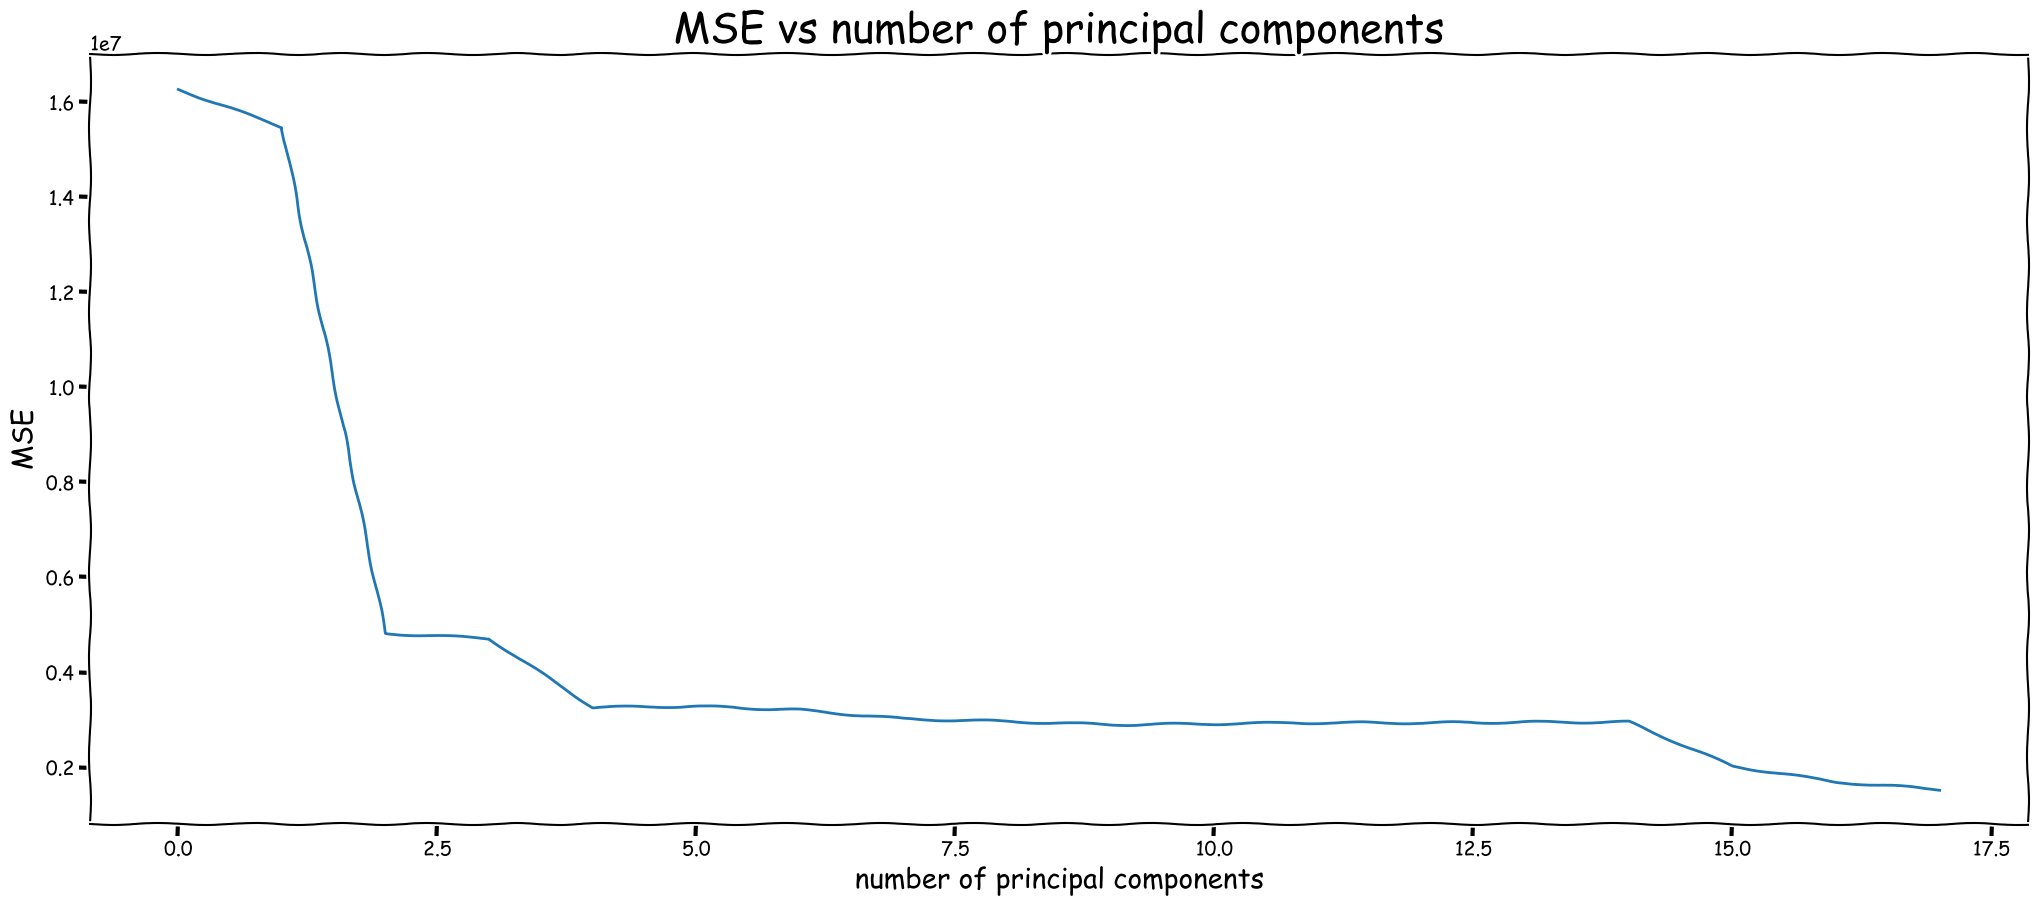

In [293]:
# plotting MSE for each component
# plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(MSEdftrain)
plt.title('MSE vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('MSE', fontsize = 20)

Text(0, 0.5, 'explained variance ratio')

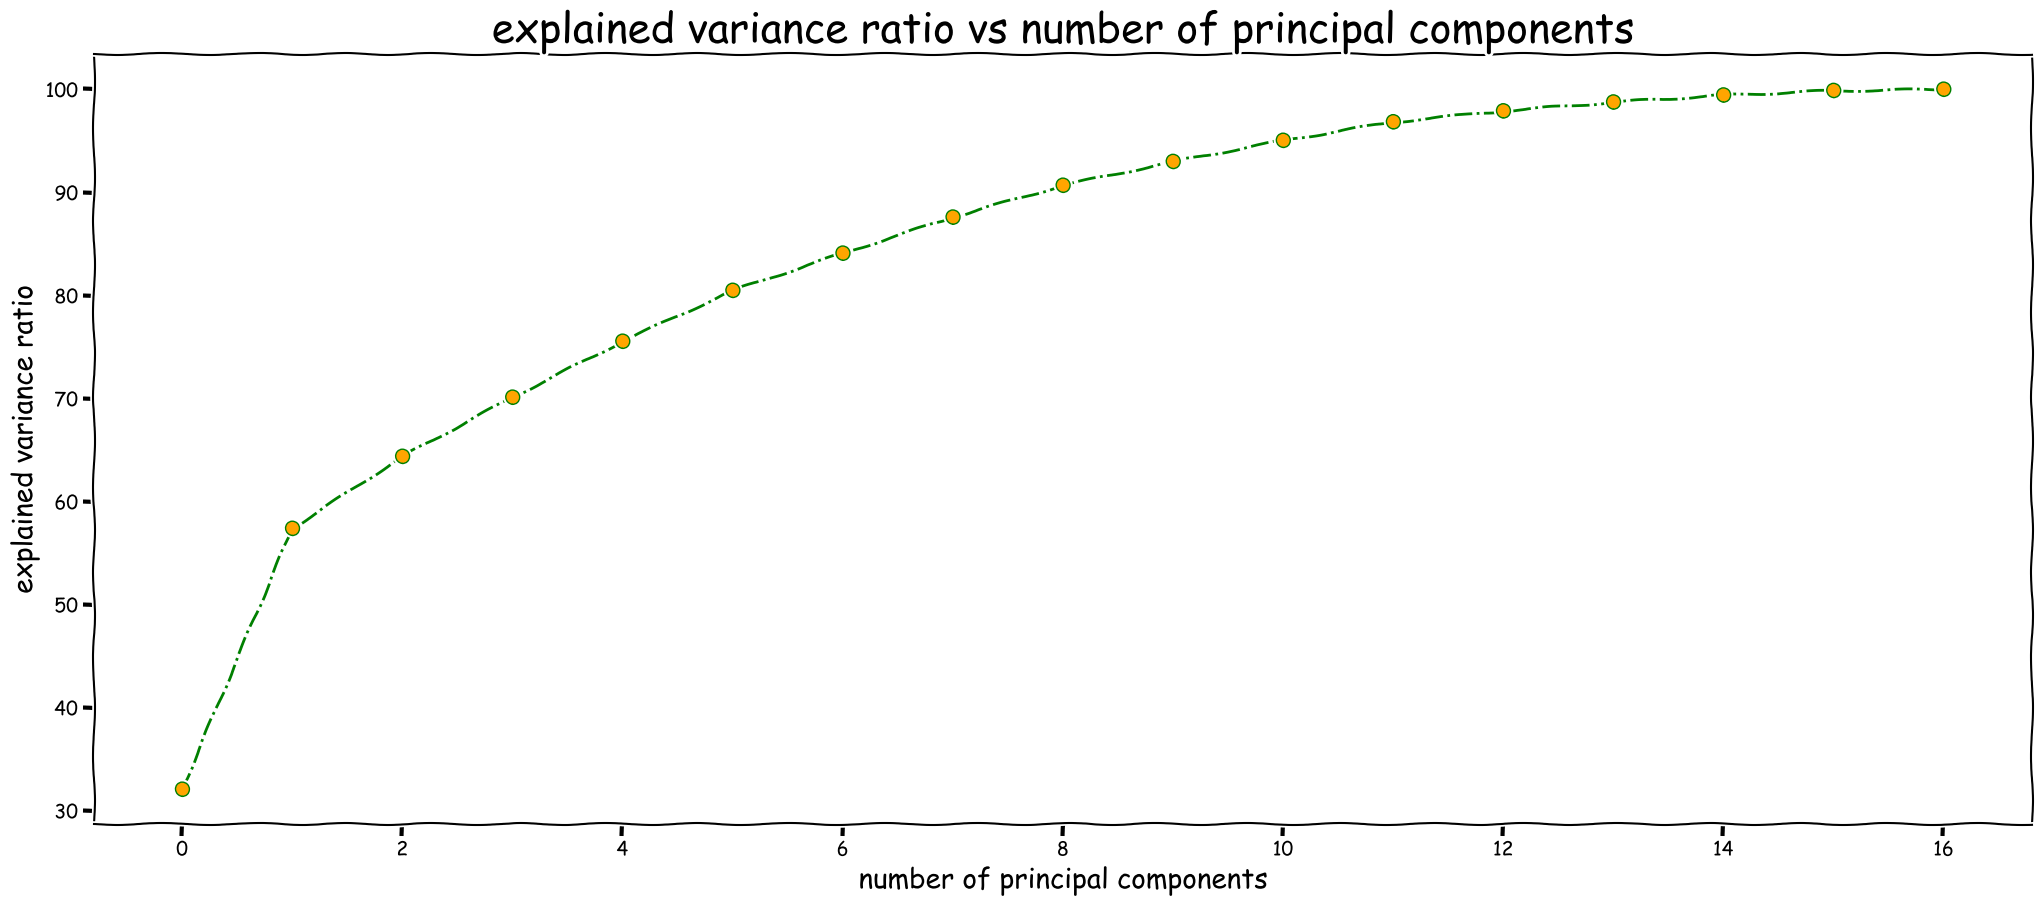

In [294]:
# plotting explained variance ratio
exp_var_ratio_scaled = pd.DataFrame(np.cumsum(np.round(pca_train.explained_variance_ratio_, decimals=4)*100))

# plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(exp_var_ratio_scaled, color='green', linestyle ='-.', marker='o', markersize=10, markerfacecolor='orange')
plt.title('explained variance ratio vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('explained variance ratio', fontsize = 20)

#### While the MSEs themselves are somewhat reduced due to scaling, the results still suggest that the best MSE is at M = 17.

In [295]:
X_scaled_test = pca.fit_transform(scale(X_test))
pcrfit17 = LinearRegression().fit(X_scaled_train, y_train)
pcrpred17 = pcrfit17.predict(X_scaled_test)

pcrerror17 = mean_squared_error(y_test, pcrpred17)
pcrerror17

9071768.372351237

#### So far, PCR has produced the largest MSE amongst all models used.

### 9.f. Partial Least Squares (PLS)

In [296]:
from sklearn.cross_decomposition import PLSRegression as PLS

In [297]:
# performing PLS on train and test data sets
n = len(X_train)
kf10train = KF(n_splits=10, shuffle=True, random_state=1)

MSEdftrain= pd.DataFrame()

# calculating MSE for the 17 components through cross-validation
for k in np.arange(1, 18):
    plstrain = PLS(n_components=k)
    msetrain = -1 * cross_val_score(plstrain, scale(X_train), y_train.ravel(), cv=kf10train, scoring='neg_mean_squared_error').mean()
    MSEdftrain = MSEdftrain.append([msetrain])
    
MSEdftrain.reset_index(drop=True, inplace=True)
MSEdftrain.columns = ['MSE']
MSEdftrain

,MSE
0,"4,052,525.111022116"
1,"3,203,146.959218187"
2,"2,570,020.262376372"
3,"2,374,095.4603648977"
4,"2,007,262.7871023454"
5,"1,680,829.7913159966"
6,"1,628,024.685477953"
7,"1,595,894.7527992404"
8,"1,591,676.0595806562"
9,"1,600,386.9321692383"


Text(0, 0.5, 'MSE')

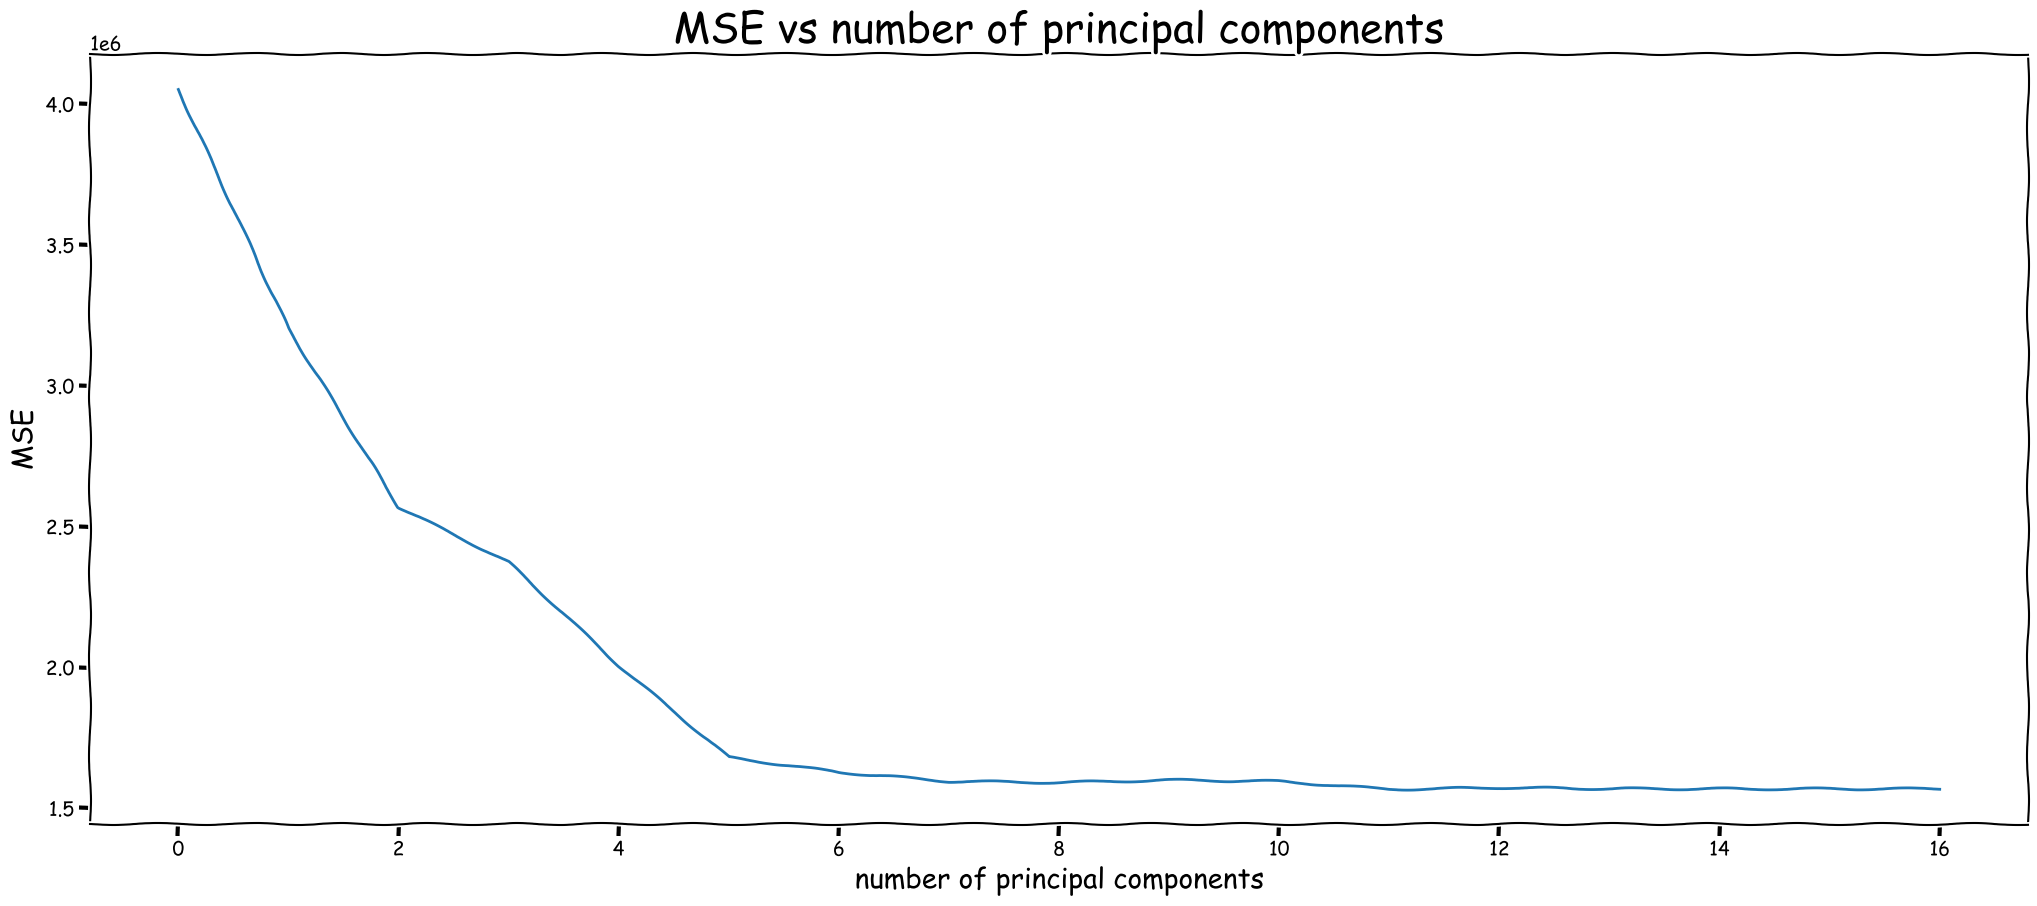

In [298]:
# plotting MSE for each component
# plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(MSEdftrain)
plt.title('MSE vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('MSE', fontsize = 20)

In [299]:
# minimum MSE
MSEdftrain.min()

MSE   1,567,103.8747426935
dtype: float64

Text(0, 0.5, 'explained variance ratio')

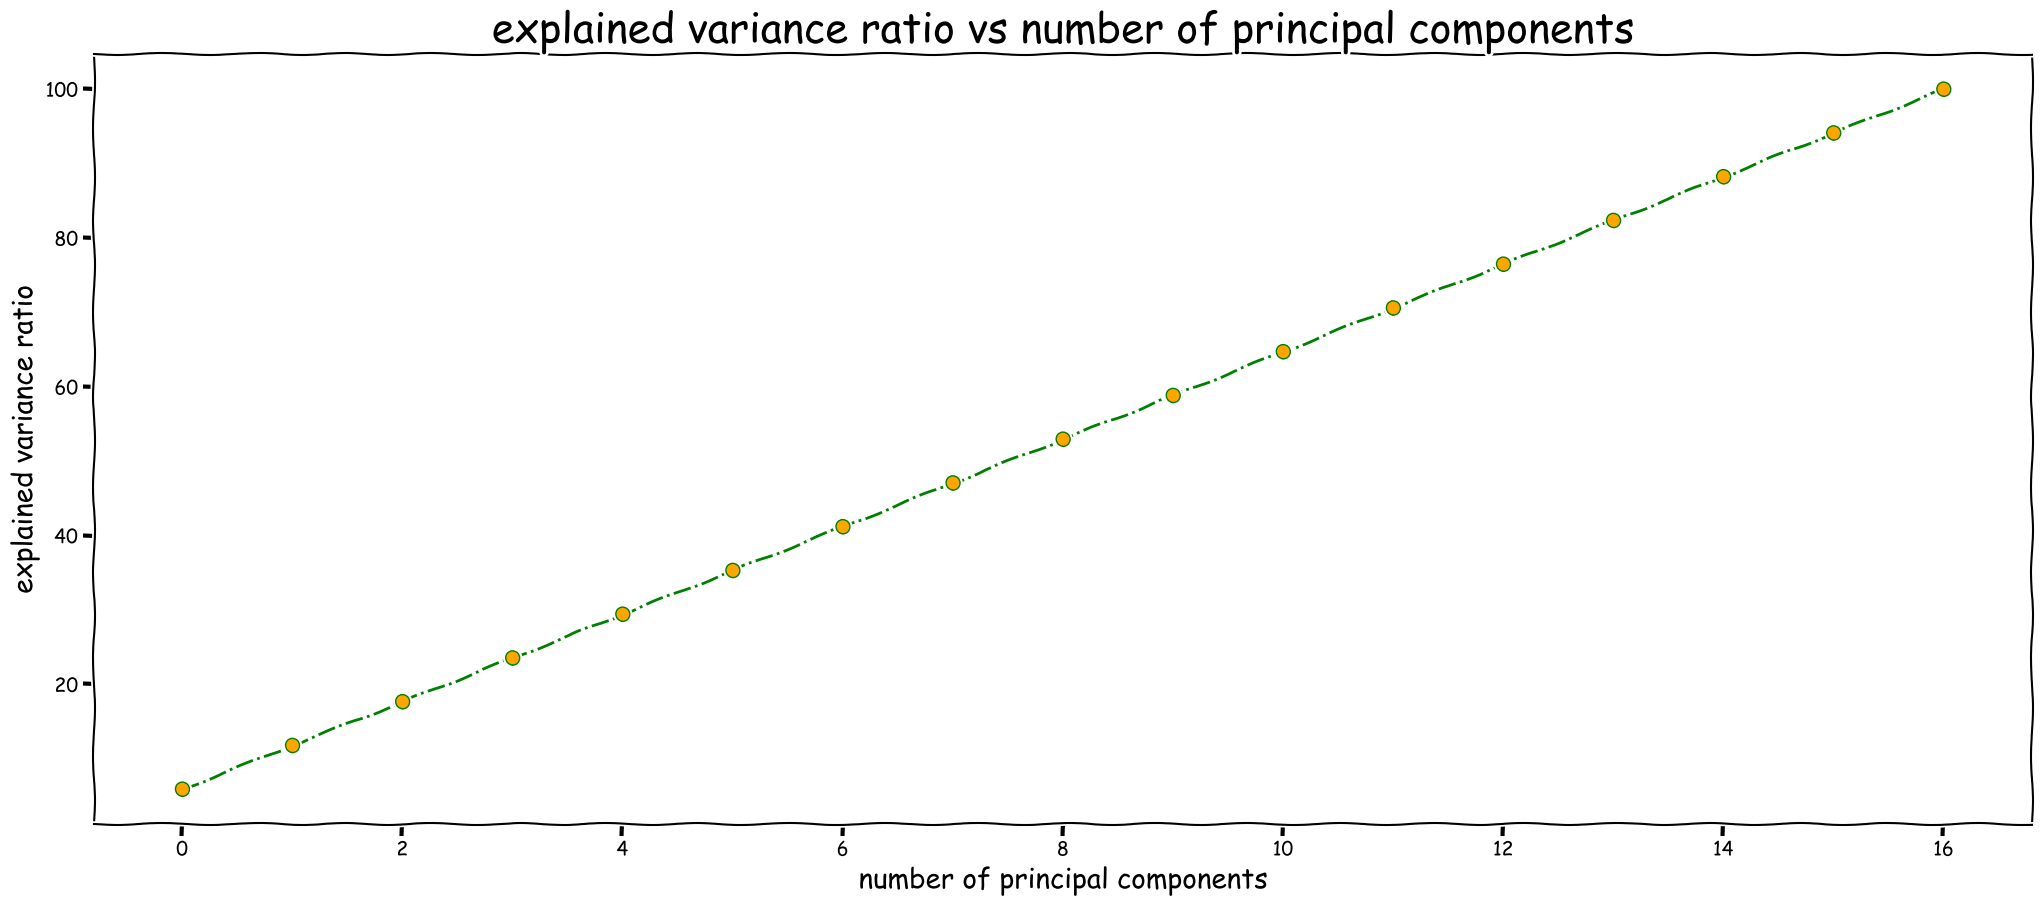

In [300]:
explained_variance_ratio_test = np.var(scale(X_train), axis=0) / np.sum(np.var(scale(X_train), axis=0)) # PLS does not have any method to automatically calculate explained variance ratio
EVR17 = pd.DataFrame(np.cumsum(np.round(explained_variance_ratio_test, decimals=4)*100), columns=['Explained Variance Ratio'])

# plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(EVR17, color='green', linestyle ='-.', marker='o', markersize=10, markerfacecolor='orange')
plt.title('explained variance ratio vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('explained variance ratio', fontsize = 20)

#### The results suggest that the best test MSE is at M = 11

In [301]:
plsfit11 = PLS(n_components = 11).fit(scale(X_train), y_train)
plspred11 = plsfit11.predict(scale(X_test))
plserror11 = mean_squared_error(y_test, plspred11)
plserror11

1341915.920495528

#### Partial least squares produces a significantly lower test MSE than principal components regression. 

In [302]:
pd.options.display.float_format = '{:,}'.format
error_list = pd.DataFrame([ols_mse, ridge_mse, lasso_mse, round(pcrerror17, 4), round(plserror11, 4)])
error_cols = pd.DataFrame(['linear regression', 'ridge regression', 'lasso regression', 'principal components regression', 'partial least squares'])
error_df = pd.concat([error_cols, error_list], axis=1)
error_df.columns = ['method', 'MSE']
error_df.sort_values('MSE')

,method,MSE
2,lasso regression,"902,138.2313"
1,ridge regression,"962,339.9227"
0,linear regression,"966,414.9739"
4,partial least squares,"1,341,915.9205"
3,principal components regression,"9,071,768.3724"


[Text(0, 0, '902138'),
 Text(0, 0, '962340'),
 Text(0, 0, '966415'),
 Text(0, 0, '1.34192e+06'),
 Text(0, 0, '9.07177e+06')]

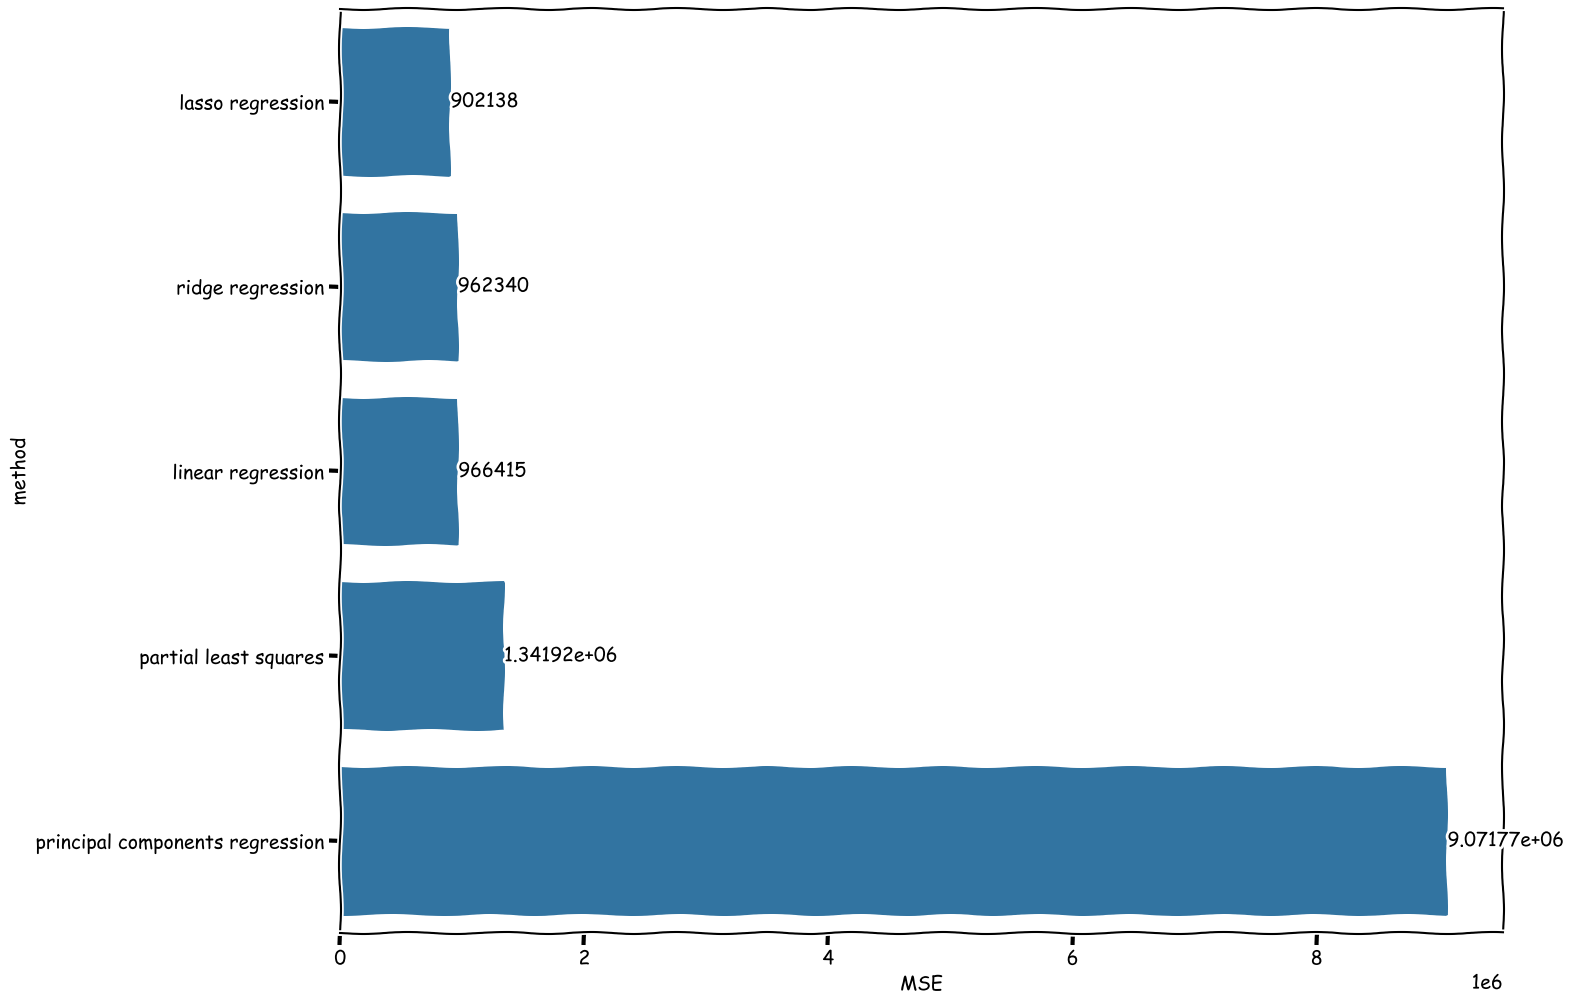

In [303]:
# plot final results by models
ax = sns.barplot(data = error_df, x = 'MSE', y = 'method', order = error_df.sort_values('MSE').method)
ax.bar_label(ax.containers[0])

## 11.  We will now try to predict per capita crime rate in the Boston data set.

In [336]:
# Load data
from ISLP import load_data
boston = load_data("Boston")

In [337]:
type(boston)

pandas.core.frame.DataFrame

In [338]:
print(boston.shape)

(506, 13)


In [339]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [324]:
#boston = pd.get_dummies(boston, columns =['CHAS'], drop_first=True)

In [350]:
from sklearn.linear_model import Lasso, LassoCV
import warnings
warnings.filterwarnings('ignore')

In [345]:
n = 100
lambdas = (np.logspace(10, -2, num=100))

In [349]:
lasso = Lasso(normalize = True)
coefs = []

for k in lambdas:
    lassolm = lasso.set_params(alpha = k).fit(X, y)
    coefs.append(lassolm.coef_)
    
np.shape(coefs)

TypeError: __init__() got an unexpected keyword argument 'normalize'

In [328]:
boston = pd.DataFrame(boston.data)
boston.columns = boston.feature_names
boston.head()

AttributeError: 'DataFrame' object has no attribute 'data'

In [329]:
pd.DataFrame(boston).head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [330]:
type(boston)

pandas.core.frame.DataFrame

In [353]:
#boston = pd.get_dummies(boston, columns =['CHAS'], drop_first=True)

In [354]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64